### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data/winequality-red.csv')   #, sep = ';'

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
X = df.drop('quality', axis = 1)
y = df['quality']

<AxesSubplot:>

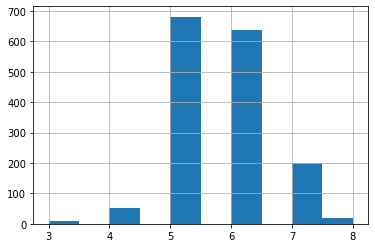

In [10]:
y.hist()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [48]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
#instantiate the models
ridge=Ridge(random_state=42)
lasso=Lasso(random_state=42)
lr=LinearRegression()

In [50]:
#train the ridge models
ridge.fit(X_train,y_train)

Ridge(random_state=42)

In [51]:
#predict the model
ridge_pred=ridge.predict(X_test)

In [52]:
feature_names=X.columns
pd.DataFrame(ridge.coef_,index=feature_names,columns=['coefficients'])

,coefficients
fixed acidity,0.012650
volatile acidity,-1.030705
citric acid,-0.155604
residual sugar,0.000648
chlorides,-1.178000
free sulfur dioxide,0.005134
total sulfur dioxide,-0.003590
density,-0.014613
pH,-0.355665
sulphates,0.717888


In [53]:
#MSe of ridge
ridge_MSE=mean_squared_error(y_test,ridge_pred)
ridge_MSE

0.39099217285755505

In [54]:
#train the lasso model
lasso.fit(X_train,y_train)

Lasso(random_state=42)

In [55]:
#predict the model
lasso_pred=lasso.predict(X_test)

In [56]:
feature_names=X.columns
pd.DataFrame(lasso.coef_,index=feature_names,columns=['lasso_coefficients'])

,lasso_coefficients
fixed acidity,0.000000
volatile acidity,-0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,-0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,-0.004239
density,-0.000000
pH,-0.000000
sulphates,0.000000


In [57]:
#MSe of ridge
lasso_MSE=mean_squared_error(y_test,lasso_pred)
lasso_MSE

0.6150055162124933

In [58]:
#Sequential feature selection
pipe=Pipeline(
              steps=[('feature_selection',SequentialFeatureSelector(estimator=LinearRegression(),
                                                                   n_features_to_select=3,
                                                                   direction='forward',
                                                                   scoring='neg_mean_squared_error',
                                                                   cv=5)),
                    ('model',LinearRegression())]
            )
pipe.fit(X_train,y_train)
seq_pred=pipe.predict(X_test)
seq_MSE=mean_squared_error(y_test,seq_pred)
seq_MSE

0.40322142258821503

In [59]:
pipe.named_steps['model'].coef_

array([-1.15394768,  0.58590009,  0.32366665])

# Scaled data

In [63]:
# Ridge model
ridge_pipe=Pipeline(
                   steps=[('scaler', StandardScaler()),
                          ('ridge_model', Ridge())])
ridge_pipe.fit(X_train,y_train)
scaled_ridge_pred=ridge_pipe.predict(X_test)

In [69]:
ridge_pipe.named_steps['ridge_model'].intercept_

5.6271893244370315

In [70]:
ridge_pipe.named_steps['ridge_model'].coef_

array([ 0.03789095, -0.1815072 , -0.02586149,  0.01267413, -0.08656018,
        0.05116873, -0.12048662, -0.03046328, -0.05261369,  0.14356923,
        0.3024526 ])

In [71]:
feature_names=X.columns
pd.DataFrame(ridge_pipe.named_steps['ridge_model'].coef_,index=feature_names,columns=['coefficients'])

,coefficients
fixed acidity,0.037891
volatile acidity,-0.181507
citric acid,-0.025861
residual sugar,0.012674
chlorides,-0.086560
free sulfur dioxide,0.051169
total sulfur dioxide,-0.120487
density,-0.030463
pH,-0.052614
sulphates,0.143569


In [72]:
#MSe of ridge
ridge_MSE=mean_squared_error(y_test,ridge_pred)
ridge_MSE

0.39099217285755505

In [73]:
#MSe of ridge
scaled_ridge_MSE=mean_squared_error(y_test,scaled_ridge_pred)
scaled_ridge_MSE

0.38831110647255684

In [75]:
print(f'The mean sqaured error of Rigde model applied in unscaled data: {ridge_MSE}')
print('\n')
print(f'The mean sqaured error of Rigde model applied in unscaled data: {scaled_ridge_MSE}')

The mean sqaured error of Rigde model applied in unscaled data: 0.39099217285755505


The mean sqaured error of Rigde model applied in unscaled data: 0.38831110647255684


# Lasso model

In [76]:
lasso_pipe=Pipeline(
                   steps=[('scaler', StandardScaler()),
                          ('lasso_model', Lasso())])
lasso_pipe.fit(X_train,y_train)
scaled_lasso_pred=lasso_pipe.predict(X_test)

In [78]:
lasso_pipe.named_steps['lasso_model'].coef_

array([ 0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.])

In [79]:
lasso_pipe.named_steps['lasso_model'].intercept_

5.627189324437031

In [80]:
#MSe oflasso
scaled_lasso_MSE=mean_squared_error(y_test,scaled_lasso_pred)
scaled_lasso_MSE

0.6198405938087134

In [81]:
print(f'The mean sqaured error of Rigde model applied in unscaled data: {lasso_MSE}')
print('\n')
print(f'The mean sqaured error of Rigde model applied in unscaled data: {scaled_lasso_MSE}')

The mean sqaured error of Rigde model applied in unscaled data: 0.6150055162124933


The mean sqaured error of Rigde model applied in unscaled data: 0.6198405938087134


# Sequentail Feature Selection

In [84]:
seq_pipe=Pipeline(
                 steps=[('scaler',StandardScaler()),
                        ('selector',SequentialFeatureSelector(estimator=LinearRegression())),
                        ('lr_model',LinearRegression())]
)
seq_pipe.fit(X_train,y_train)
scaled_seq_pred=seq_pipe.predict(X_test)

In [90]:
seq_pipe.named_steps['lr_model'].coef_

array([-0.19170062, -0.08042384, -0.0870429 ,  0.14518892,  0.30473588])

In [92]:
seq_pipe.named_steps['lr_model'].intercept_

5.627189324437031

In [93]:
scaled_seq_MSE=mean_squared_error(y_test,scaled_seq_pred)
scaled_seq_MSE

0.39725845223618483

In [94]:
seq_lasso_pipe=Pipeline(
                 steps=[('scaler',StandardScaler()),
                        ('selector',SequentialFeatureSelector(estimator=Lasso(),n_features_to_select=4)),
                        ('lr_model',LinearRegression())]
)
seq_lasso_pipe.fit(X_train,y_train)
scaled_seq_lasso_pred=seq_lasso_pipe.predict(X_test)

In [95]:
scaled_seq_lasso_MSE=mean_squared_error(y_test,scaled_seq_lasso_pred)
scaled_seq_lasso_MSE

0.5021492434115942

# RFE (recursive feature elimination)

In [96]:
rfe_lasso_pipe=Pipeline(
                 steps=[('scaler',StandardScaler()),
                        ('selector_rfe',RFE(estimator=Lasso(),n_features_to_select=4)),
                        ('lr_model',LinearRegression())]
)
rfe_lasso_pipe.fit(X_train,y_train)
scaled_rfe_lasso_pred=rfe_lasso_pipe.predict(X_test)

In [97]:
scaled_rfe_lasso_MSE=mean_squared_error(y_test,scaled_rfe_lasso_pred)
scaled_rfe_lasso_MSE

0.4430693425123562